**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [5]:
cartoon = cv2.imread("./images/cartoon.bmp")
cartoon_y = cv2.imread("./images/cartoon_y.jpg")
girl = cv2.imread("./images/girl.png") #grayscale image
girl_y = cv2.imread("./images/girl_y.jpg")
fingerprint = cv2.imread("./images/fingerprint.jpg")
fingerprint_y = cv2.imread("./images/fingerprint_y.jpg")

In [6]:
%ls

 Volume in drive F is New Volume
 Volume Serial Number is C0BD-9966

 Directory of f:\Ratan\LS '24\Machine-Learning-LS-24\Week 3\Assignment\OpenCV

20-07-2024  09:10    <DIR>          .
20-07-2024  01:27    <DIR>          ..
20-07-2024  01:27             7,029 ImagePreprocessing-OpenCV.ipynb
20-07-2024  09:10    <DIR>          images
20-07-2024  01:27         1,117,592 images.zip
20-07-2024  01:27               489 README.md
               3 File(s)      1,125,110 bytes
               3 Dir(s)  146,463,838,208 bytes free


## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

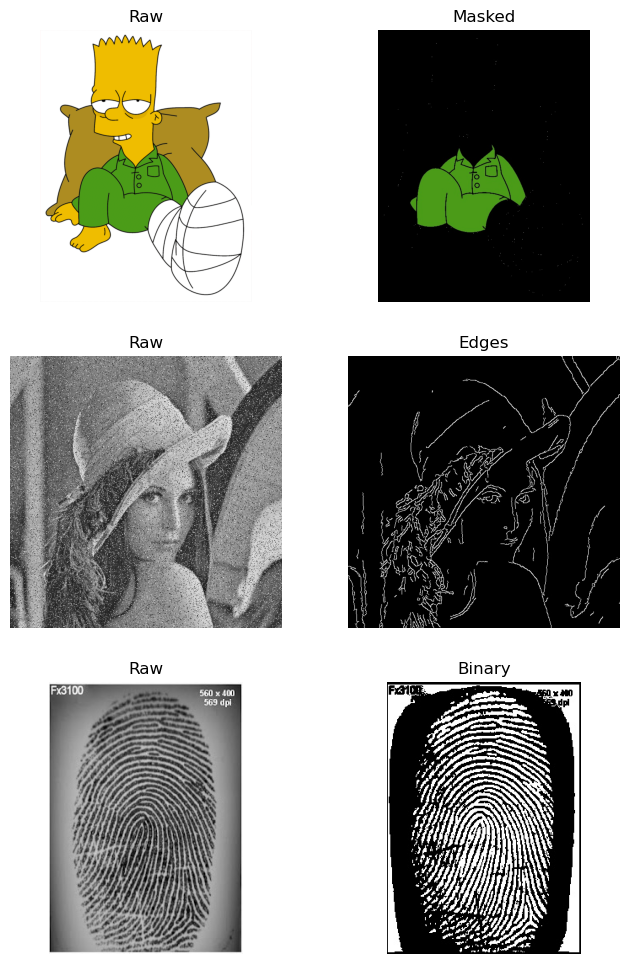

In [7]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [11]:
#START CODE HERE (Do all your processing here)

cartoon_y_mentee = None #(in RGB format only)
hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# Define range of green color in HSV
lower_green = np.array([30, 50, 50])
upper_green = np.array([100, 255, 255])

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)

# Bitwise-AND mask and original image
cartoon_y_mentee = cv2.bitwise_and(cartoon, cartoon, mask=mask)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

-1

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [39]:
#START CODE HERE (Do all your processing here)

girl_y_mentee = None
gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

# Perform edge detection using Canny
edges = cv2.Canny(blur, 40, 255) 

# Create a black image (all zeros) of the same size as the original image
black_background = np.zeros_like(girl)

# Copy the detected edges onto the black background
black_background[edges != 0] = (255, 255, 255)
girl_y_mentee = black_background

#END CODE HERE (the final processed image should be girl_y_mentee)

-1

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [46]:
#START CODE HERE (Do all your processing here)

fingerprint_y_mentee = None #(in Binary format only i.e. pixel intensity = 0 or 255)
fingerprint_y_mentee = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
fingerprint_y_mentee = cv2.threshold(fingerprint_y_mentee, 105, 255, cv2.THRESH_BINARY)[1]
fingerprint_y_mentee = cv2.bitwise_not(fingerprint_y_mentee)
cv2.imshow("fingerprint_y_mentee", fingerprint_y_mentee)
cv2.waitKey(0)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

-1

## Comparison

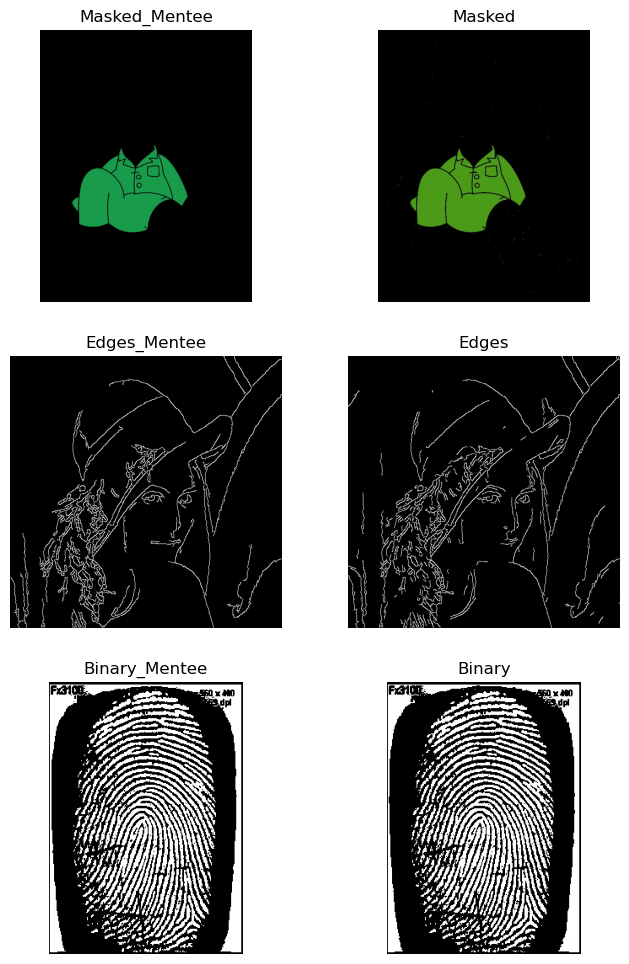

In [47]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()